In [1]:
import torch
import pytorch_lightning as pl


import datasets
from datasets import load_dataset
from transformers import AutoTokenizer


In [2]:
tokenizer = AutoTokenizer.from_pretrained("google/bert_uncased_L-2_H-128_A-2")

In [3]:
# help(tokenizer)

In [3]:
cola_dataset = load_dataset('glue', 'cola')

Reusing dataset glue (C:\Users\faizan\.cache\huggingface\datasets\glue\cola\1.0.0\dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


In [4]:
cola_dataset

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 8551
    })
    validation: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 1043
    })
    test: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 1063
    })
})

In [5]:
train_set = cola_dataset['train']
val_set = cola_dataset['validation']
test_set = cola_dataset['test']

In [6]:
print(f'total examples in the training set: {len(train_set)}')
print(f'total examples in the validation set: {len(val_set)}')
print(f'total examples in the test set: {len(test_set)}')

total examples in the training set: 8551
total examples in the validation set: 1043
total examples in the test set: 1063


In [7]:
# show a sample example from each sets
# training set
import random

rand_index = random.randint(0, len(test_set))
train_sample = train_set[rand_index]
val_sample = val_set[rand_index]
test_sample = test_set[rand_index]
print('training sample: \n')
print(train_sample)
print()

print('validation sample: \n')
print(val_sample)
print()

print('test sample: \n')
print(test_sample)

training sample: 

{'idx': 905, 'label': 1, 'sentence': "Joe's neuroses bother his patrons, and Sally's neuroses do too."}

validation sample: 

{'idx': 905, 'label': 1, 'sentence': 'Lou hoped the umbrella was broken.'}

test sample: 

{'idx': 905, 'label': -1, 'sentence': 'Dale gave Brooke a hard time.'}


In [8]:
train_set.features

{'sentence': Value(dtype='string', id=None),
 'label': ClassLabel(num_classes=2, names=['unacceptable', 'acceptable'], names_file=None, id=None),
 'idx': Value(dtype='int32', id=None)}

In [9]:
print(tokenizer)

PreTrainedTokenizerFast(name_or_path='google/bert_uncased_L-2_H-128_A-2', vocab_size=30522, model_max_len=1000000000000000019884624838656, is_fast=True, padding_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})


In [10]:
print(f'training sample sentence: {train_sample["sentence"]}')

training sample sentence: Joe's neuroses bother his patrons, and Sally's neuroses do too.


In [11]:
print(f'tokenizing the sentence: {tokenizer(train_sample["sentence"])}')

tokenizing the sentence: {'input_ids': [101, 3533, 1005, 1055, 11265, 10976, 8583, 8572, 2010, 13497, 1010, 1998, 8836, 1005, 1055, 11265, 10976, 8583, 2079, 2205, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [12]:
print(f"Decoding the tokenizer output: {tokenizer.decode(tokenizer(train_sample['sentence'])['input_ids'])}")

Decoding the tokenizer output: [CLS] joe's neuroses bother his patrons, and sally's neuroses do too. [SEP]


In [13]:
def encode(samples):
    return tokenizer(
        samples['sentence'],
        truncation = True,
        padding = 'max_length',
        max_length = 512
    )

In [14]:
train_dataset = train_set.map(encode, batched = True)

Parameter 'function'=<function encode at 0x00000219C6DDD4C0> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.
100%|██████████| 9/9 [00:03<00:00,  2.66ba/s]


In [15]:
train_dataset.set_format(type = 'torch', columns= ["input_ids", "attention_mask", "label"])

In [16]:
train_dataset

Dataset({
    features: ['attention_mask', 'idx', 'input_ids', 'label', 'sentence', 'token_type_ids'],
    num_rows: 8551
})

In [18]:
# data loaders 
dataloader = torch.utils.data.DataLoader(train_dataset, batch_size= 32)

In [19]:
next(iter(dataloader))

{'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]]),
 'input_ids': tensor([[  101,  2256,  2814,  ...,     0,     0,     0],
         [  101,  2028,  2062,  ...,     0,     0,     0],
         [  101,  2028,  2062,  ...,     0,     0,     0],
         ...,
         [  101,  5965, 12808,  ...,     0,     0,     0],
         [  101,  2198, 10948,  ...,     0,     0,     0],
         [  101,  3021, 24471,  ...,     0,     0,     0]]),
 'label': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
         1, 0, 0, 1, 1, 1, 1, 1])}

In [20]:
for i, batch in enumerate(dataloader):
    print(batch['input_ids'].shape, batch['attention_mask'].shape, batch['label'].shape)
    if i == 10:
        break

torch.Size([32, 512]) torch.Size([32, 512]) torch.Size([32])
torch.Size([32, 512]) torch.Size([32, 512]) torch.Size([32])
torch.Size([32, 512]) torch.Size([32, 512]) torch.Size([32])
torch.Size([32, 512]) torch.Size([32, 512]) torch.Size([32])
torch.Size([32, 512]) torch.Size([32, 512]) torch.Size([32])
torch.Size([32, 512]) torch.Size([32, 512]) torch.Size([32])
torch.Size([32, 512]) torch.Size([32, 512]) torch.Size([32])
torch.Size([32, 512]) torch.Size([32, 512]) torch.Size([32])
torch.Size([32, 512]) torch.Size([32, 512]) torch.Size([32])
torch.Size([32, 512]) torch.Size([32, 512]) torch.Size([32])
torch.Size([32, 512]) torch.Size([32, 512]) torch.Size([32])


In [21]:
from transformers import AutoModel

In [22]:
model_name = "google/bert_uncased_L-2_H-128_A-2"
model = AutoModel.from_pretrained(model_name)

Downloading: 100%|██████████| 17.7M/17.7M [00:34<00:00, 509kB/s] 


In [23]:
import torch.nn as nn
import torch.functional as F


In [24]:
linear = nn.Linear(model.config.hidden_size, 2)

In [26]:
# model

In [5]:
import torchmetrics
from omegaconf import OmegaConf, DictConfig
from transformers import AutoModelForSequenceClassification
from sklearn.metrics import confusion_matrix

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [37]:
x = np.linspace(2, 1000, 10000)
y = np.sin(x)
z = np.cos(x)
t = np.tan(x)/100 + 10 * np.sin(x)

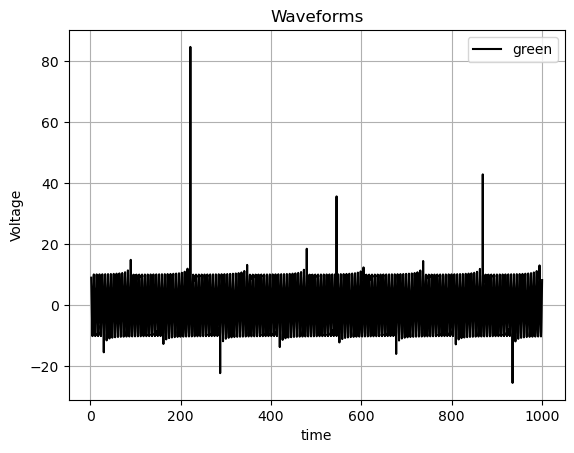

In [38]:
# plt.plot(x, y, 'g-' )
# plt.plot(x, z, 'r-')
plt.plot(x, t, 'k-')
plt.legend(('green', 'red', 'black'))
plt.xlabel('time')
plt.ylabel('Voltage')
plt.title('Waveforms')
plt.grid()